<a href="https://colab.research.google.com/github/Animesh227/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_ANIMESH_CHAKRABORTY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting max display column limit to max
pd.set_option("display.max_columns", None)

#set style
plt.style.use('seaborn')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Bike-sharing-Capstone-project/SeoulBikeData.csv', encoding= 'unicode_escape')

## Data Inspection

In [5]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


In [6]:
# Check 1st Five rows
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Check last 5 rows
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# Check the info of dataset to know the data types of columns or variable
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
dataset.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


## Observations

In [11]:
# Check columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
dataset['Date'] = dataset['Date'].astype('datetime64[ns]')

In [13]:
# Creating new columns 'Month', 'Year' ,'Day.
dataset['Month'] = dataset['Date'].dt.month

dataset['Day'] = dataset['Date'].dt.day_name()  

In [14]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
dataset['Weekdays_or_weekend'] = dataset['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [15]:
# Now We can Drop Day and Date columns.
dataset.drop(['Date',"Day"],axis=1 ,inplace=True)

In [16]:
# check the Newly Created columns
dataset.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [17]:
#Get distinct categories counts forSeasons categories
dataset['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [18]:
#Get distinct categories counts for Holiday categories
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [19]:
#Get distinct categories counts for Functioning_Day categories
dataset['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [20]:
#Get distinct categories counts for for Month categories
dataset['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [21]:
#Get distinct categories counts for for Weekdays_or_weekend categories
dataset['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [22]:
## Check the Summary of Bike data to egt mean,max,25%,50%,75% etc
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Weekdays_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [23]:
# checking Duplicate rows in our BikeData.
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


## Exploratory Data Analysis

In [24]:
# create numeric columns list.
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Weekdays_or_weekend'],
      dtype='object')

In [25]:
# create categorical column list
categorical_columns = list(set(dataset.columns) - set(numeric_features))
categorical_columns

['Holiday', 'Functioning Day', 'Seasons']

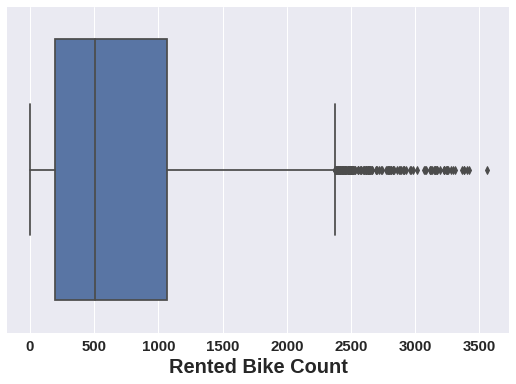

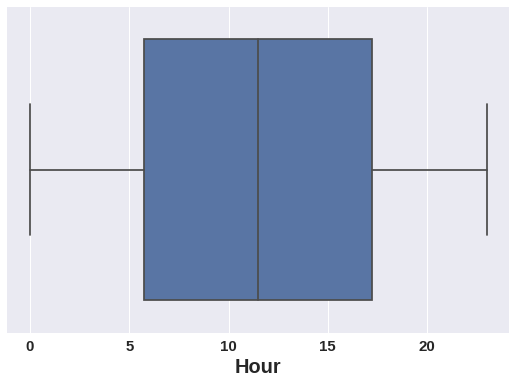

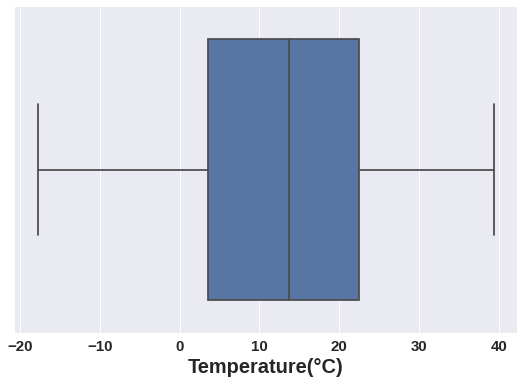

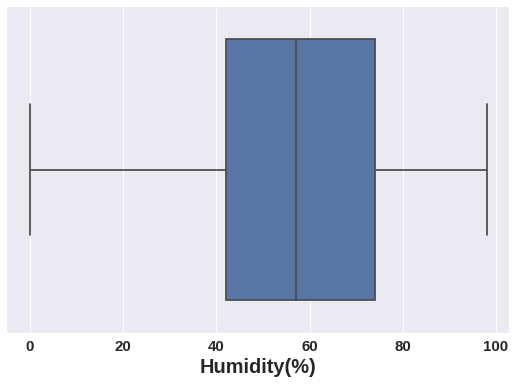

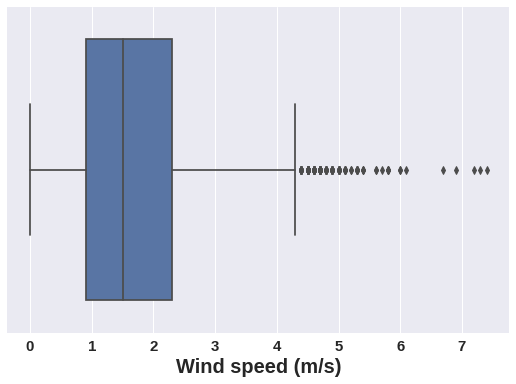

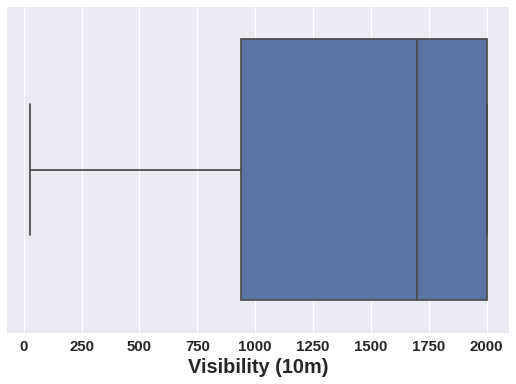

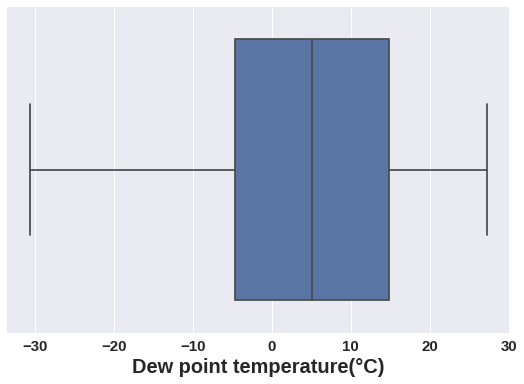

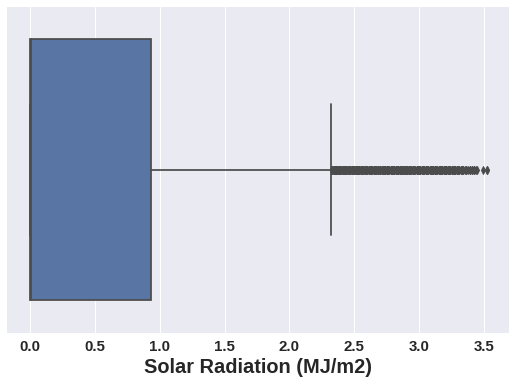

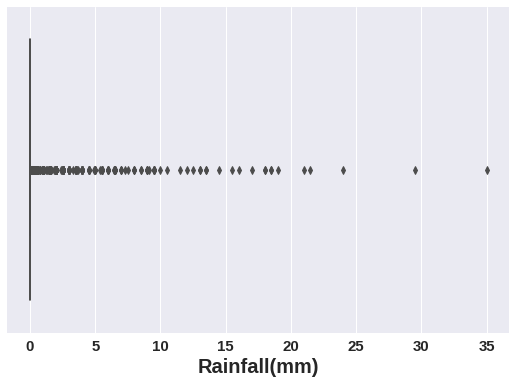

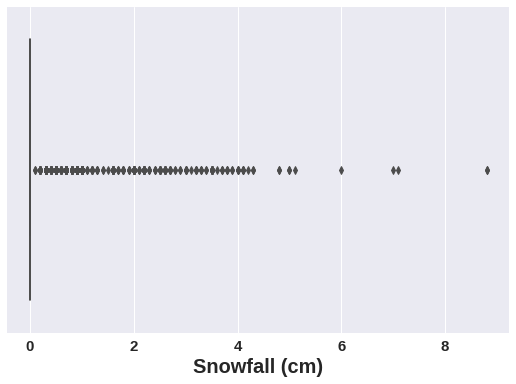

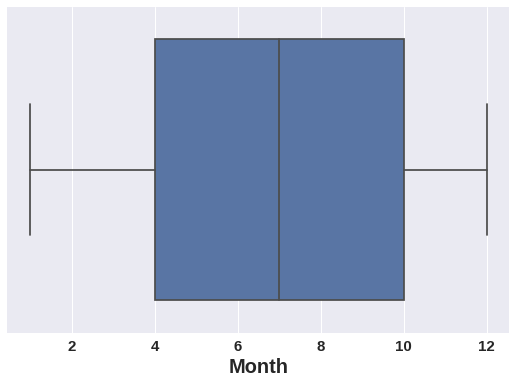

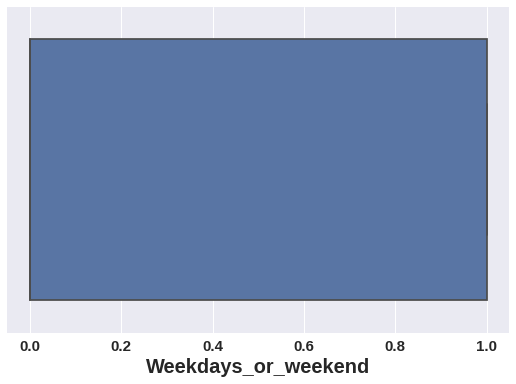

In [26]:
# plotting box plot of numeric columns to check oultliers
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

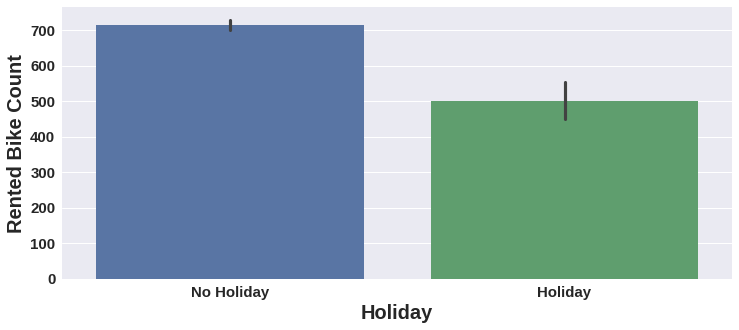

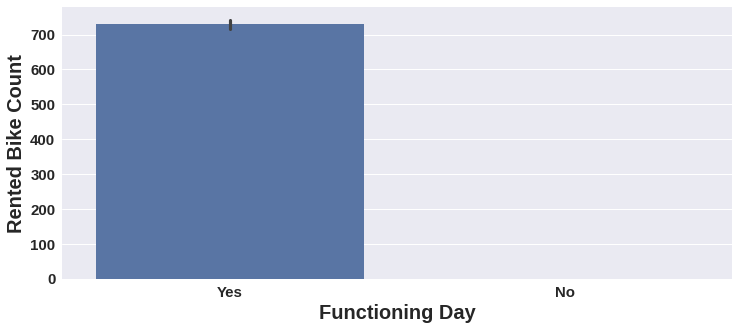

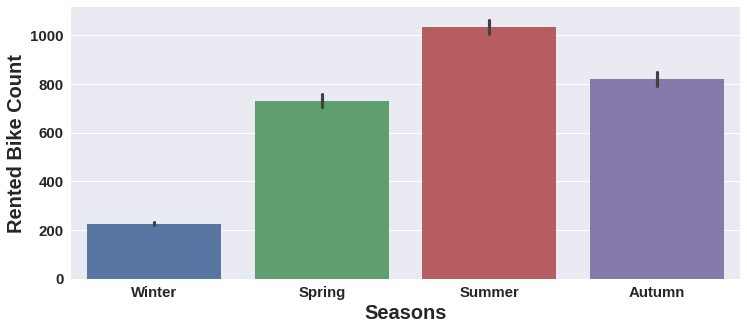

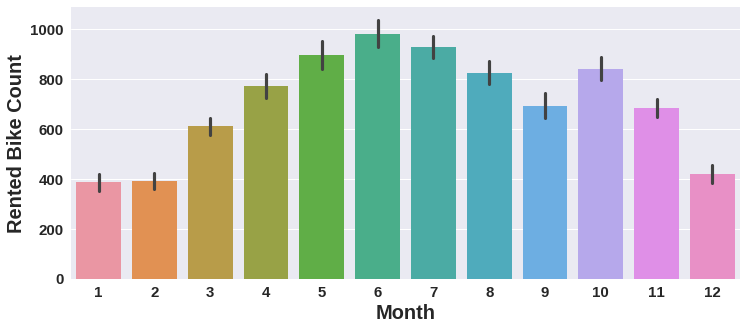

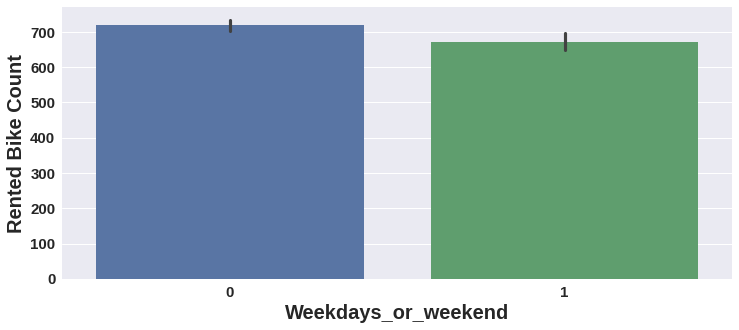

In [27]:
# Adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['Rented Bike Count'])

## Dependent Variable (Bike Rent Count) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

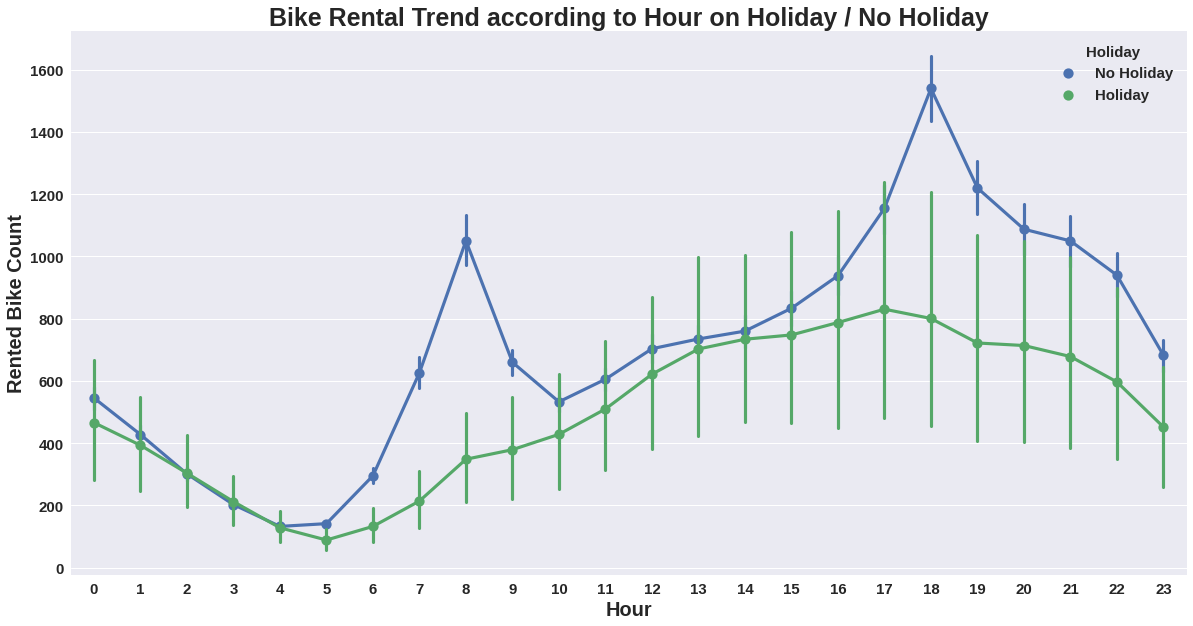

In [28]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['Hour'],y = dataset['Rented Bike Count'],hue = dataset['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

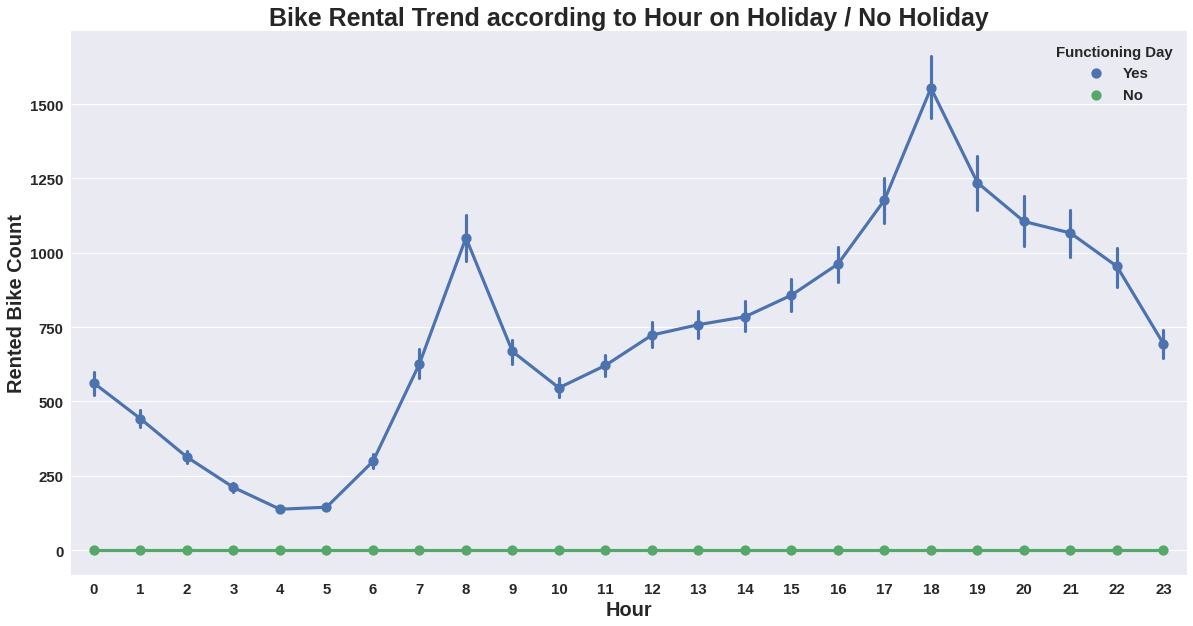

In [29]:
# Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['Hour'],y = dataset['Rented Bike Count'],hue = dataset['Functioning Day'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

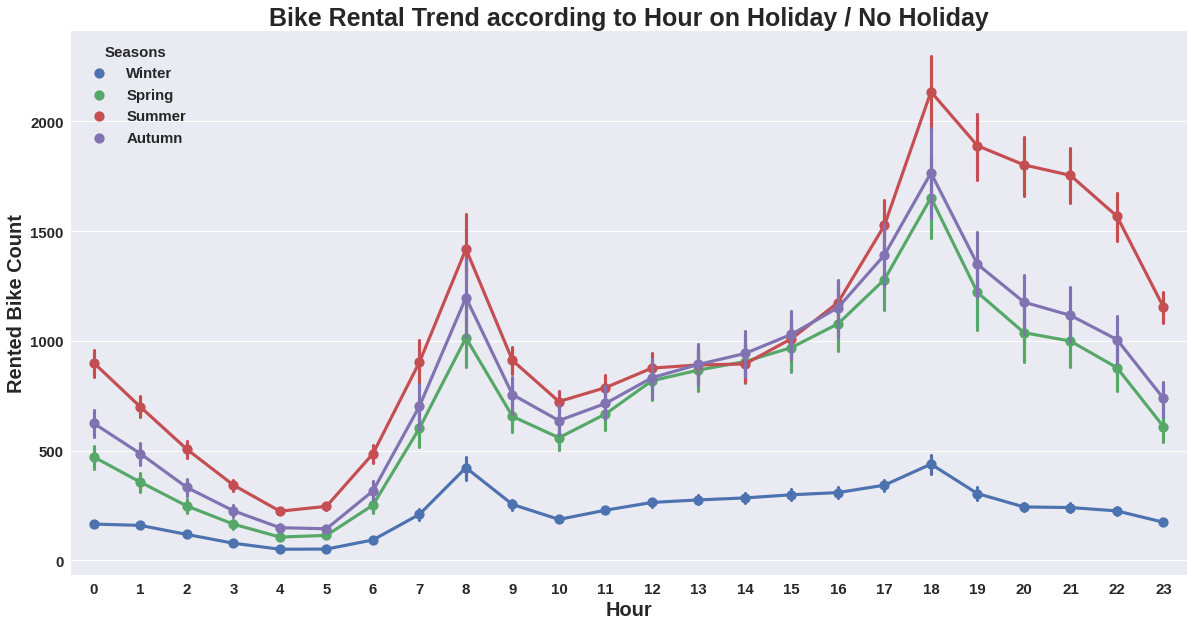

In [30]:
# Bike Rental trend with respect to Hour on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['Hour'],y = dataset['Rented Bike Count'],hue = dataset['Seasons'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

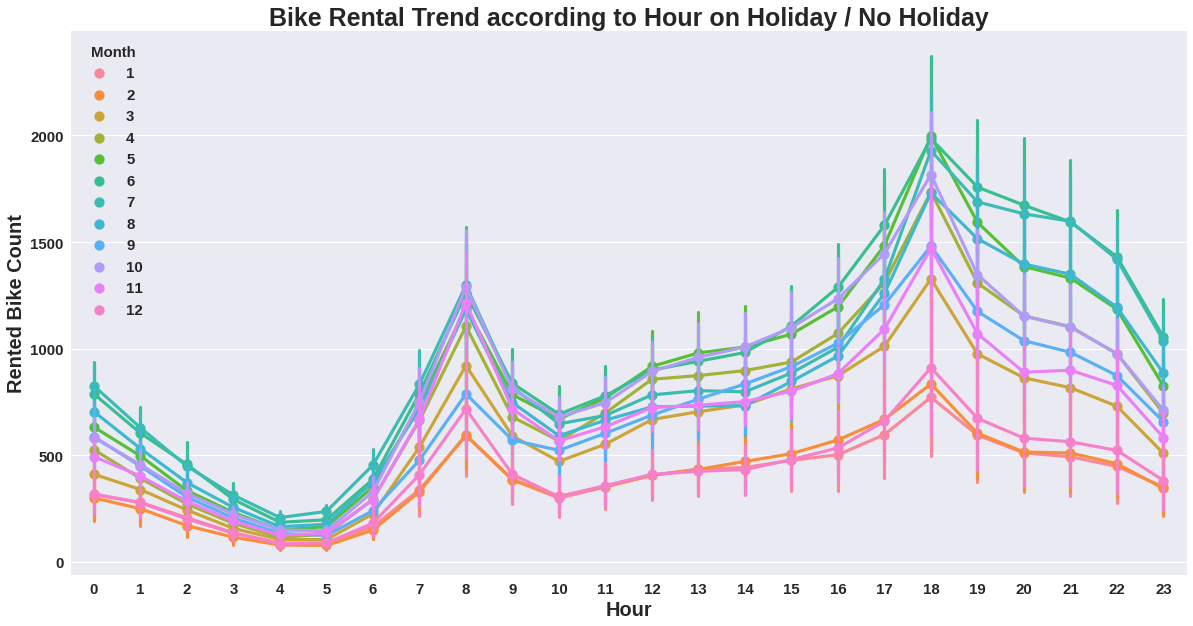

In [31]:
# Bike Rental trend with respect to Hour on Months.
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['Hour'],y = dataset['Rented Bike Count'],hue = dataset['Month'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

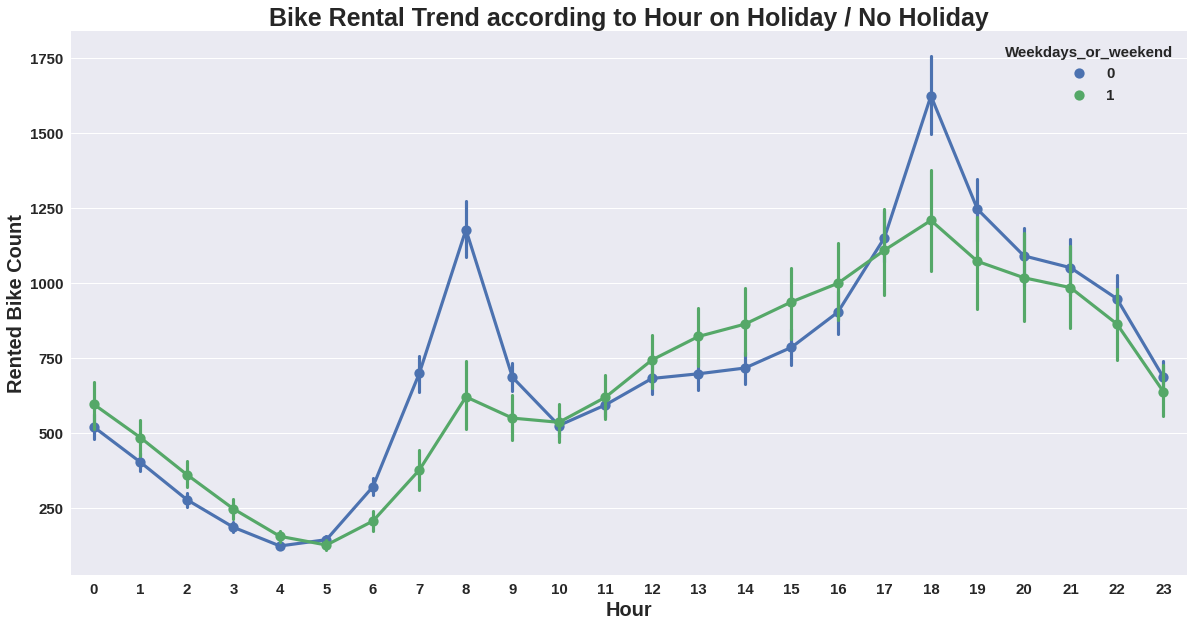

In [32]:
# Bike Rental trend with respect to Hour on Weekdays or weekend.
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['Hour'],y = dataset['Rented Bike Count'],hue = dataset['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

##Distribution of Target Variable

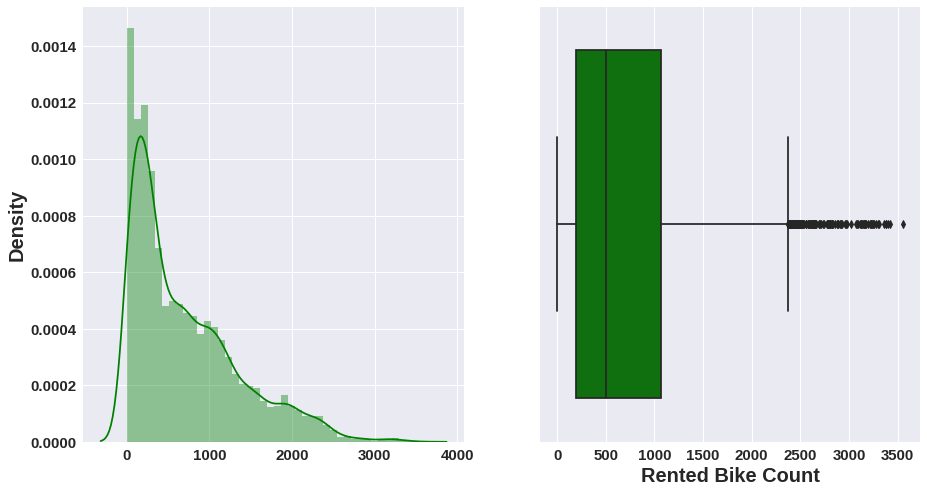

In [33]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['Rented Bike Count'],color='g',ax=axes[0])
sns.boxplot(x = dataset['Rented Bike Count'],color='g',ax=axes[1])

*   Our target varibale's distribution is slightly right skewed. 

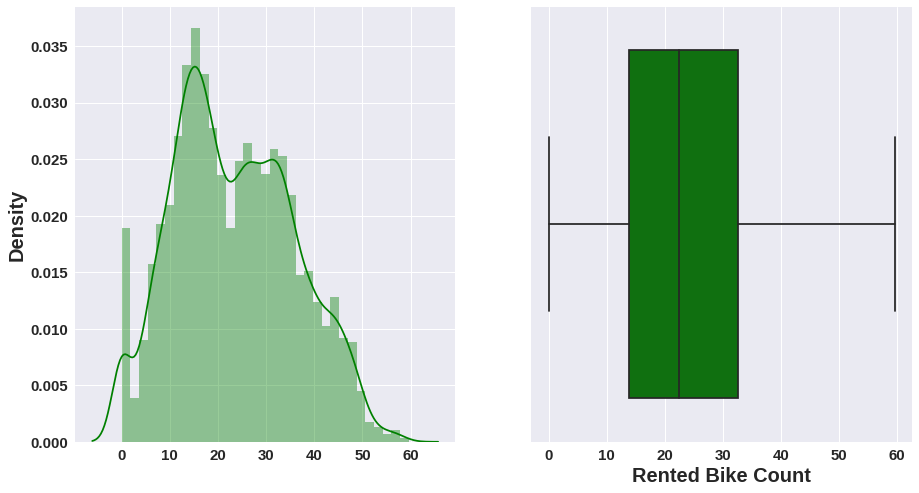

In [34]:
# Normalizing  our target variable by squre root method
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(dataset['Rented Bike Count']),color='g',ax=axes[0])
sns.boxplot(x = np.sqrt(dataset['Rented Bike Count']),color='g',ax=axes[1])

*   We normalized our target variable by square root method.
*   In box plot we can see that there are no outliers present.


### Univariate Analysis

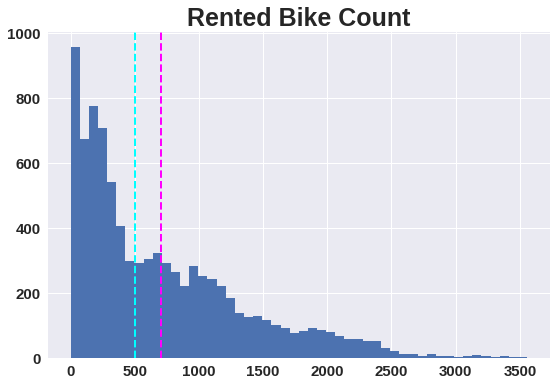

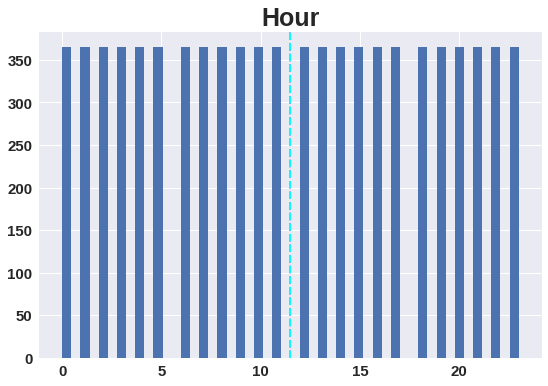

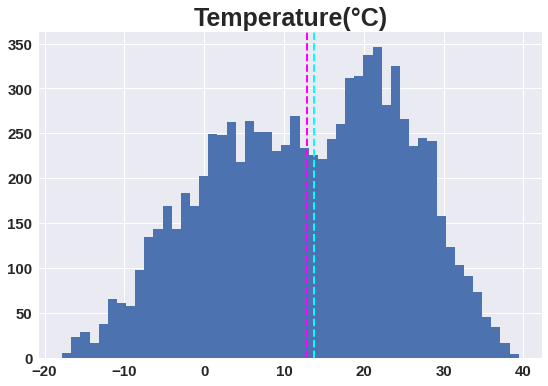

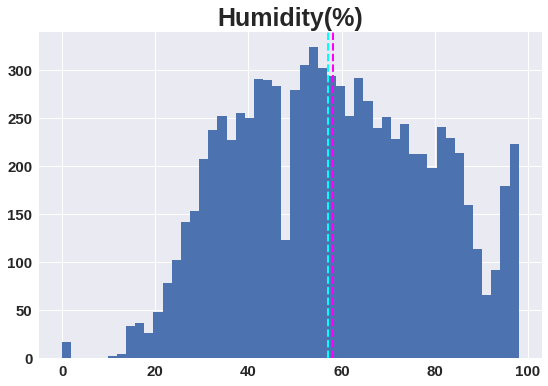

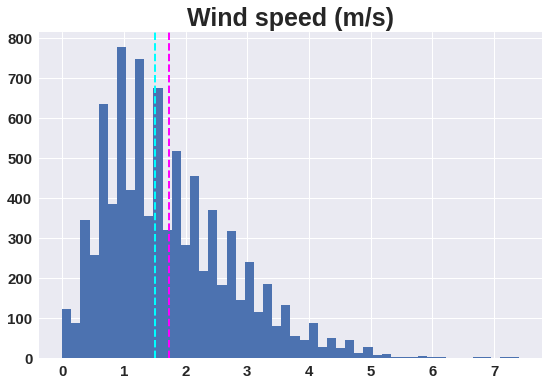

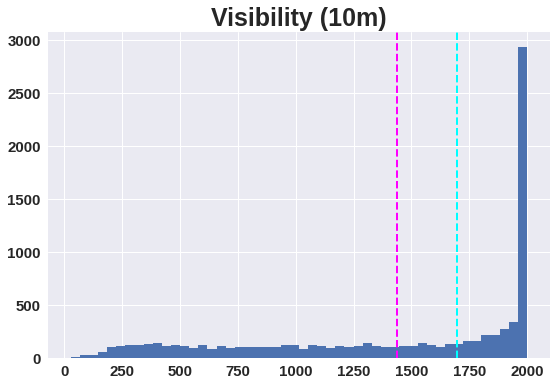

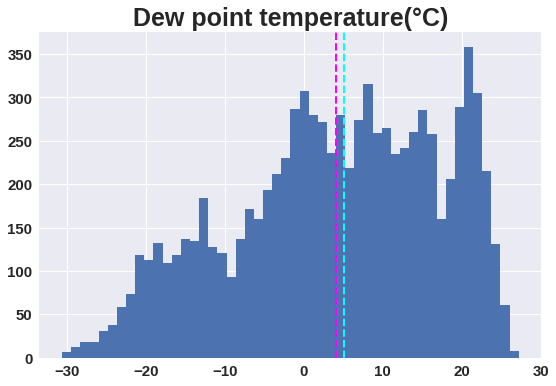

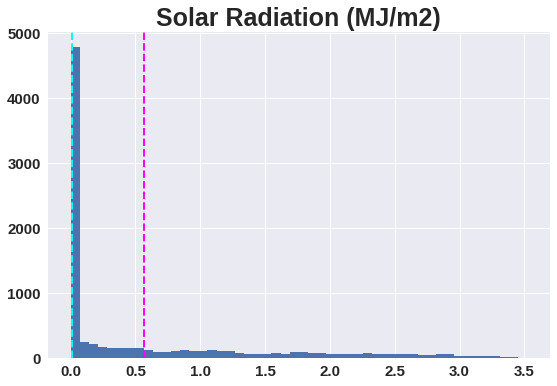

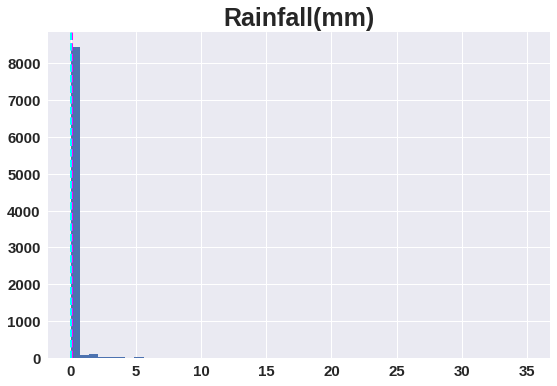

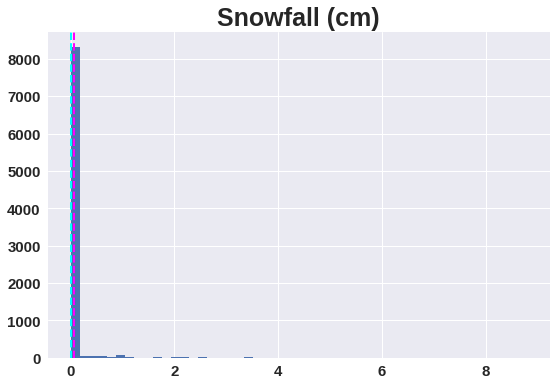

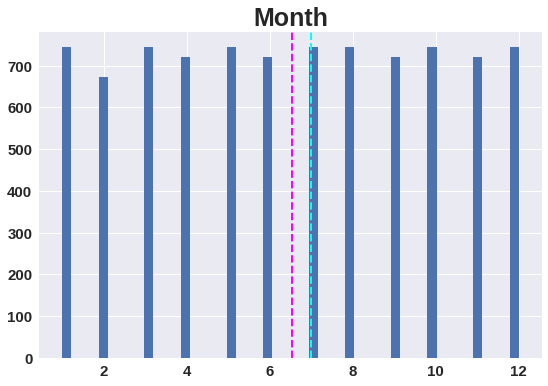

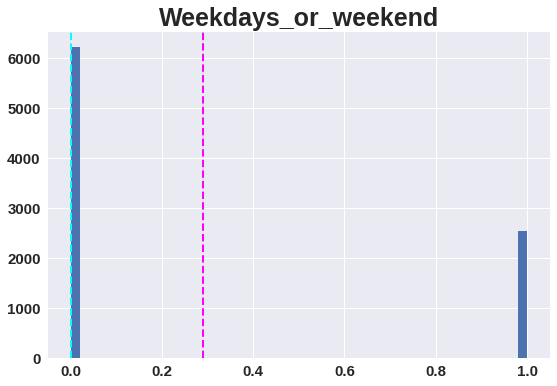

In [35]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

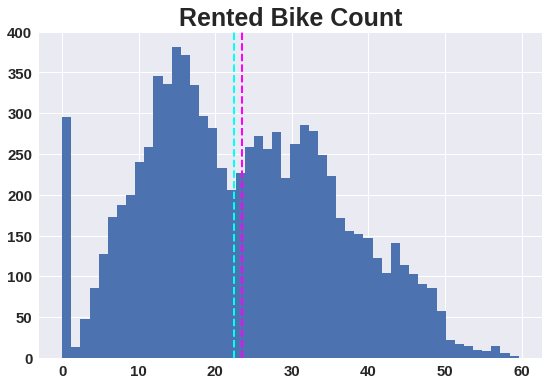

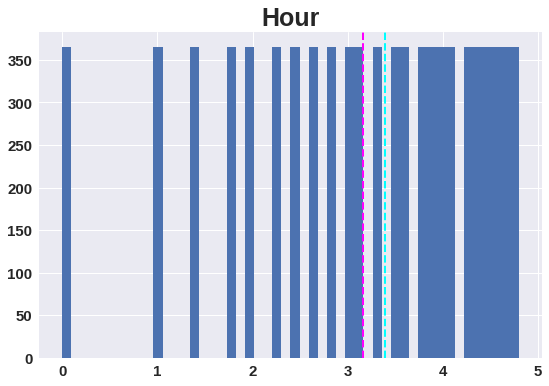

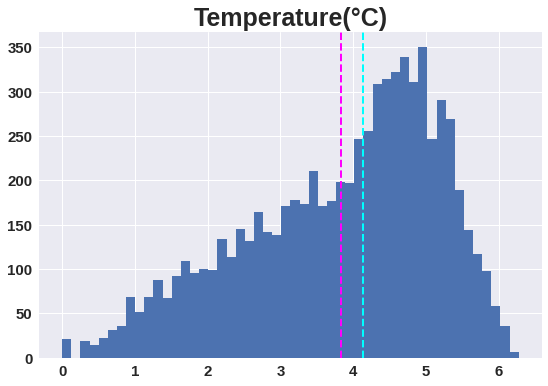

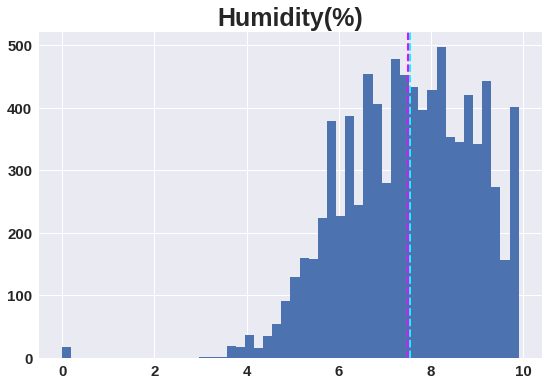

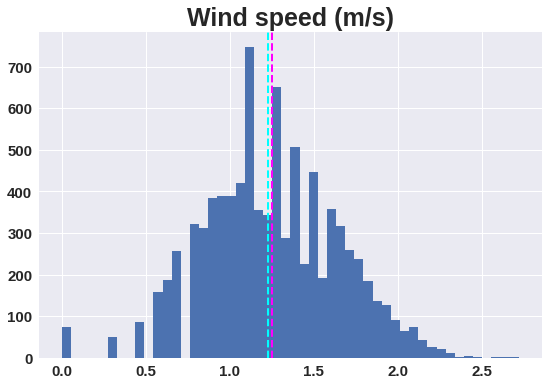

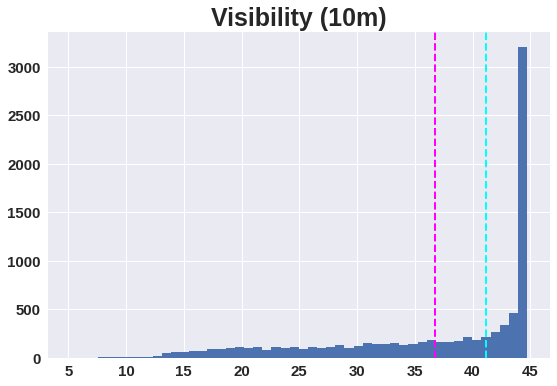

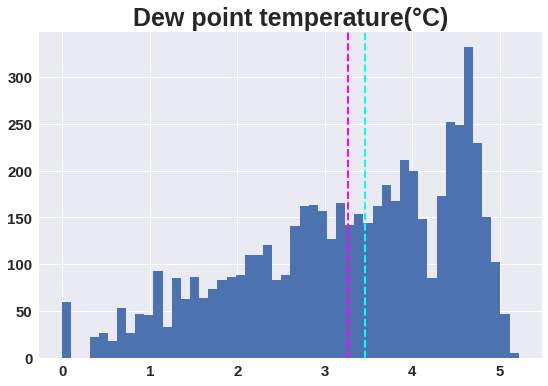

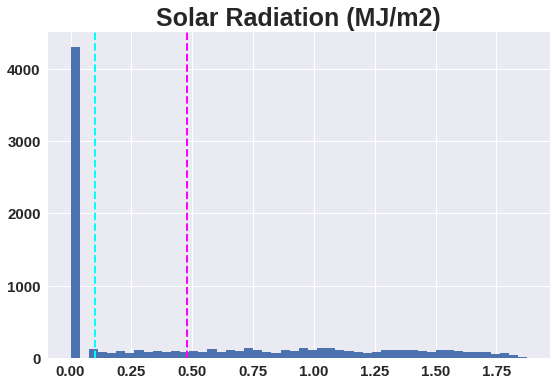

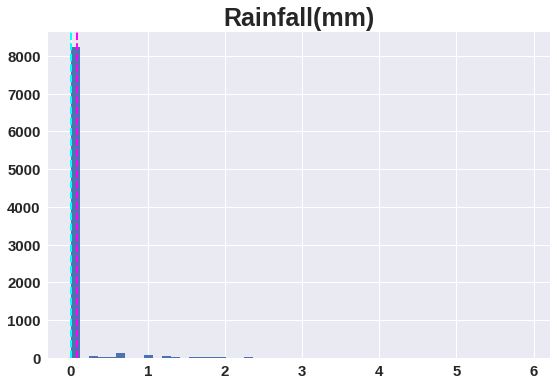

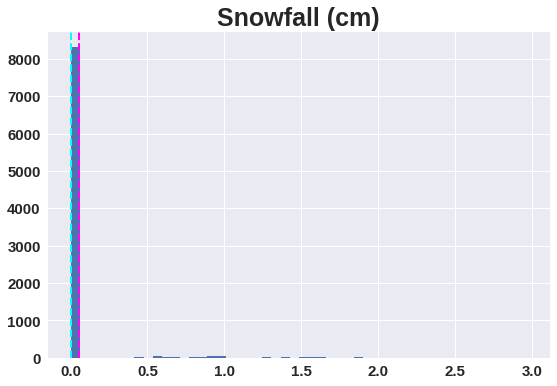

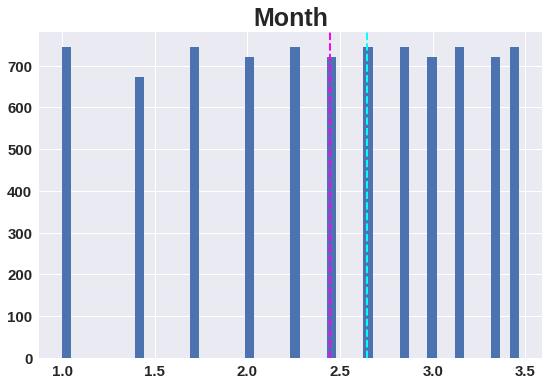

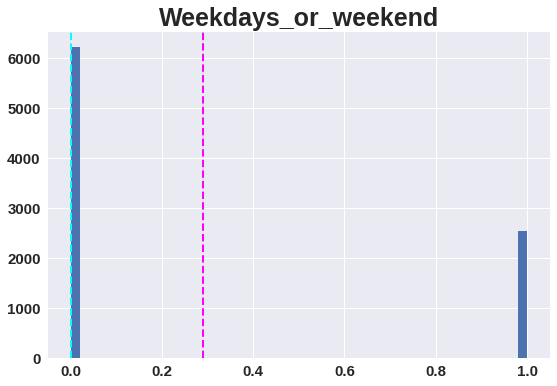

In [36]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Bivariate Analysis

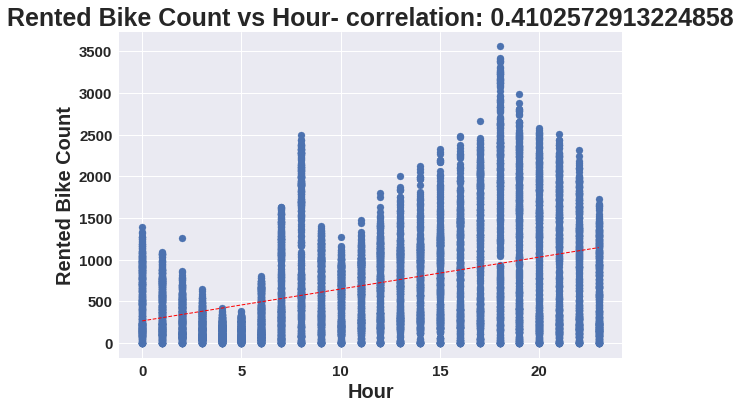

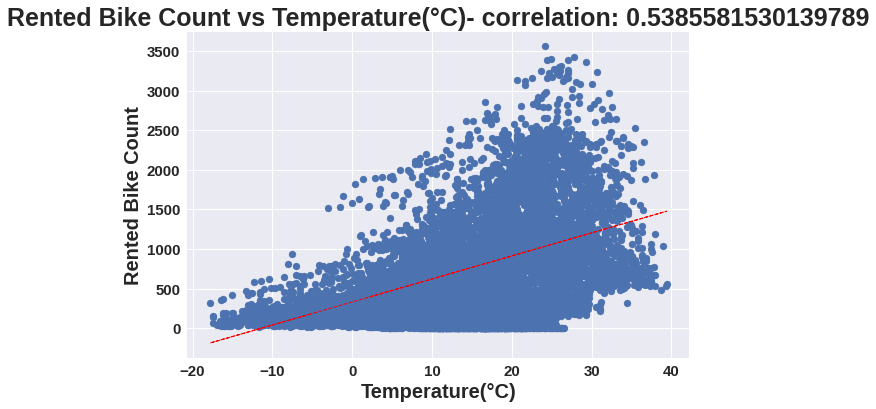

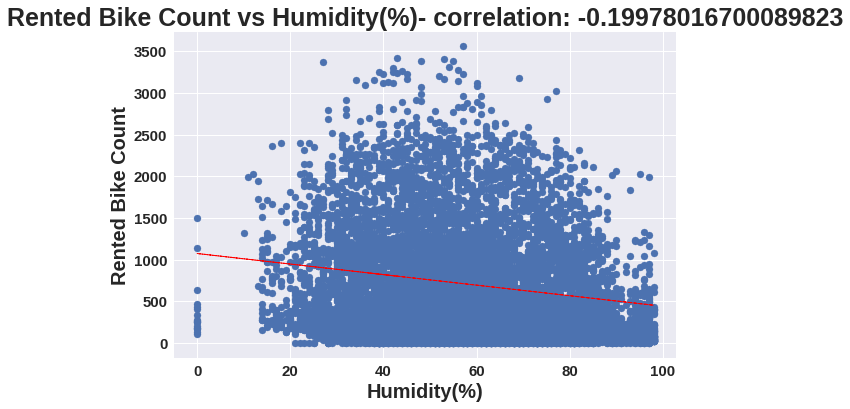

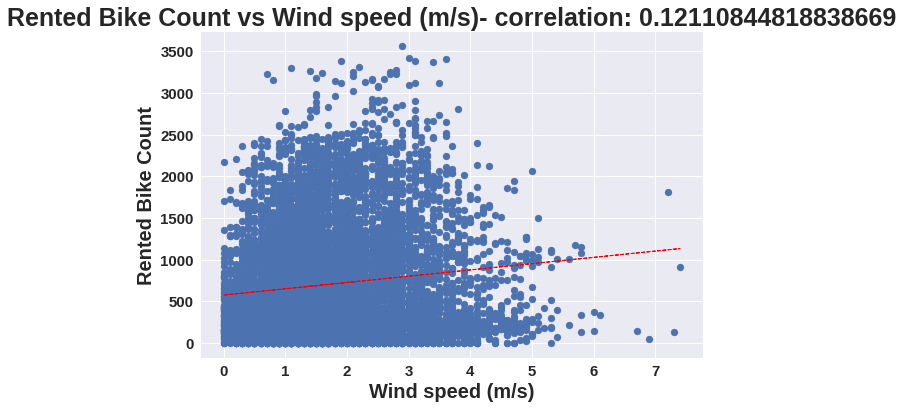

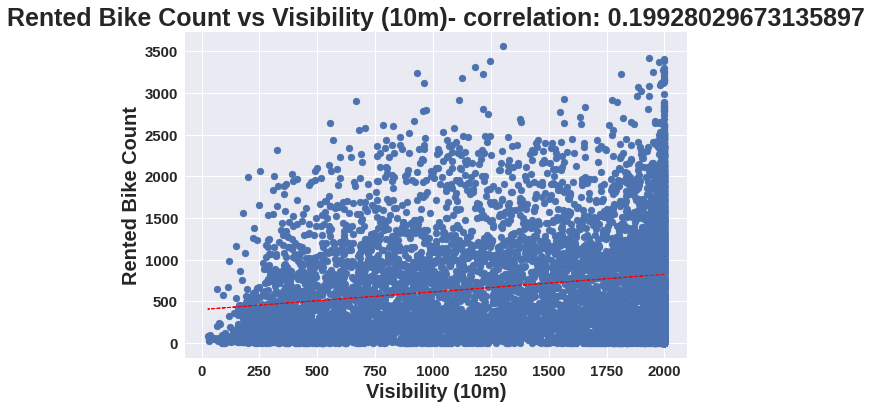

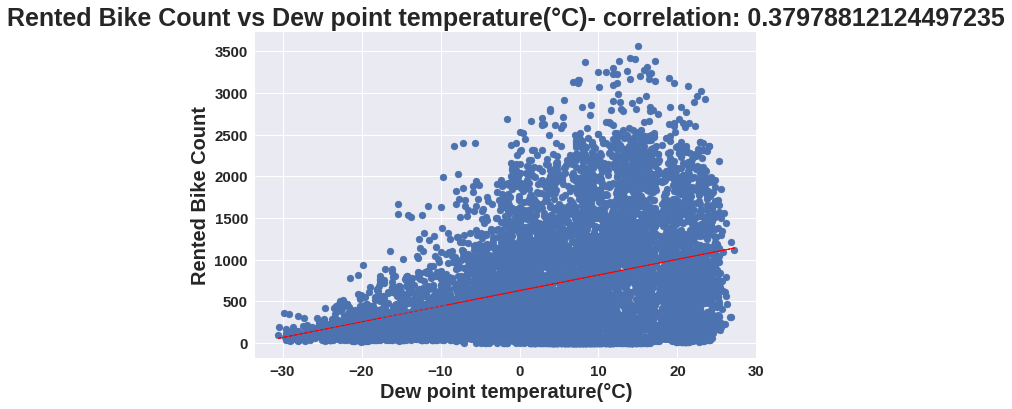

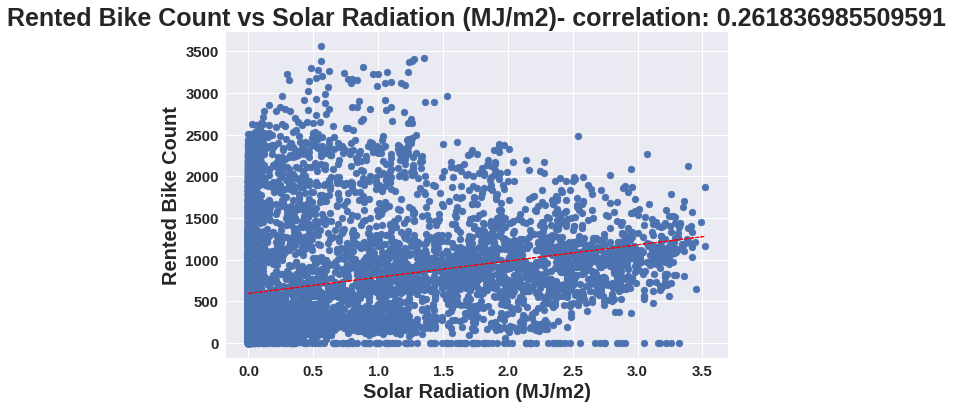

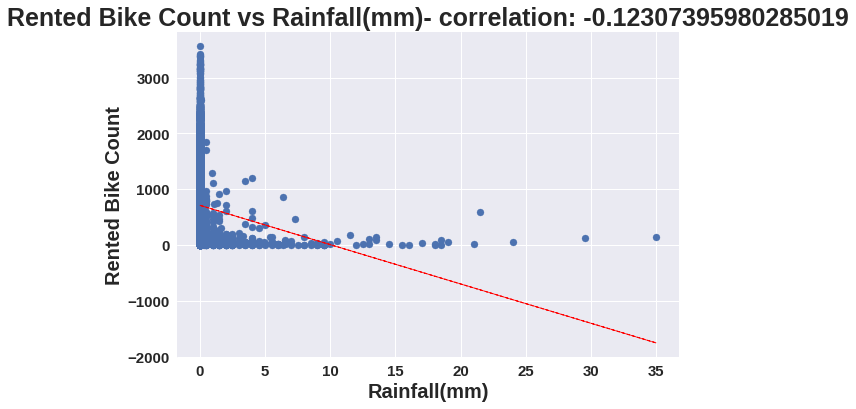

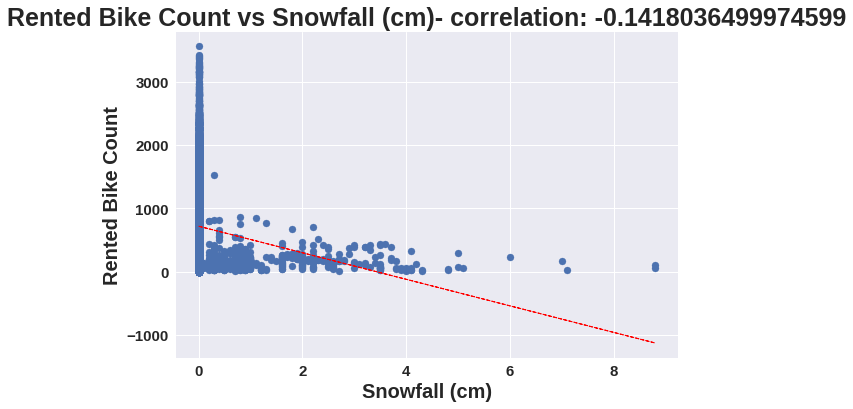

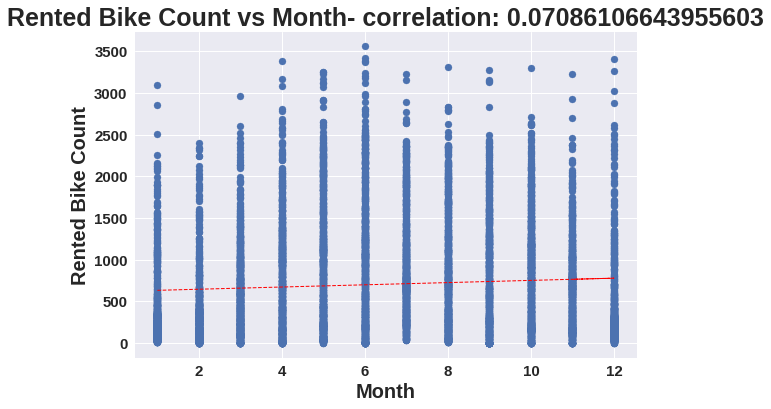

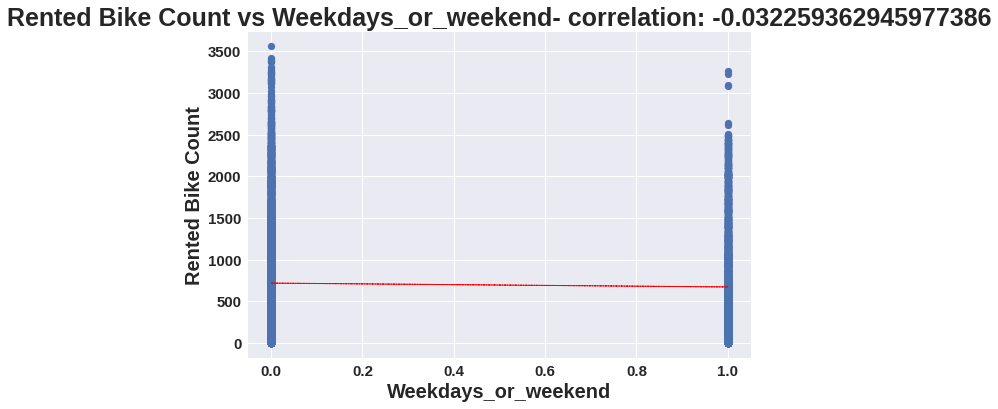

In [37]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

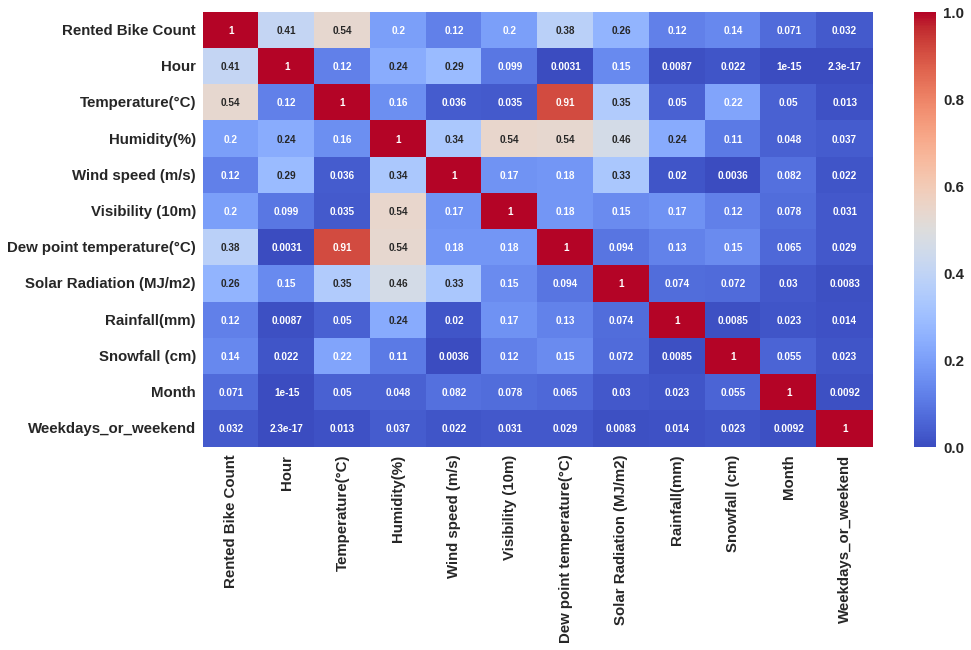

In [38]:
#checking correlation using heatmap
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [39]:
# Make copy of dataset
df = dataset.copy()

### Modeling

In [40]:
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [41]:
# Since Temperature and Dew point temperature are highly corelated (91%) with each other. We will drop dew point temperature.
df.drop('Dew point temperature(°C)',inplace=True,axis=1)

In [42]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [43]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,Month,4.580307
9,Weekdays_or_weekend,1.399708


Humidity vif is greater than 5 so we will remove that column. 

In [44]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Humidity(%)']]])

,variables,VIF
0,Hour,3.931193
1,Temperature(°C),2.543847
2,Wind speed (m/s),4.301342
3,Visibility (10m),5.330632
4,Solar Radiation (MJ/m2),1.894468
5,Rainfall(mm),1.045135
6,Snowfall (cm),1.081123
7,Month,3.741610
8,Weekdays_or_weekend,1.375146


Visibility vif is greater than 5 so we will remove that column. 

In [45]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Humidity(%)','Visibility (10m)']]])

,variables,VIF
0,Hour,3.755736
1,Temperature(°C),2.492225
2,Wind speed (m/s),3.748534
3,Solar Radiation (MJ/m2),1.893823
4,Rainfall(mm),1.030569
5,Snowfall (cm),1.077566
6,Month,3.049391
7,Weekdays_or_weekend,1.350943


Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this columns from our dataset (df).

In [46]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity(%)','Visibility (10m)'],inplace=True,axis=1)

In [47]:
# Checking categoiries in season column.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [48]:
# Create dummy variables for the catgeorical variable Season
df['Spring'] = np.where(df['Seasons'] == 'Spring', 1, 0)
df['Summer'] = np.where(df['Seasons'] == 'Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons'] == 'Autumn', 1, 0)
df['Winter'] = np.where(df['Seasons'] == 'Winter', 1, 0)

In [49]:
# Drop the original column Seasons from the dataframe
df.drop(columns=['Seasons'],axis=1,inplace=True)

In [50]:
# Checking categoiries in holiday columns.
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [51]:
# Labeling for holiday=1 and no holiday=0
df['Holiday'] = df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [52]:
# Checking categoiries in Functioning Day columns.
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [53]:
# # Labeling for Yes=1 and no No=0
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1, 'No':0})

In [54]:
# Checking dummy and labeled columns
df.head()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Weekdays_or_weekend,Spring,Summer,Autumn,Winter
0,254,0,-5.2,2.2,0.0,0.0,0.0,0,1,1,0,0,0,0,1
1,204,1,-5.5,0.8,0.0,0.0,0.0,0,1,1,0,0,0,0,1
2,173,2,-6.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1
3,107,3,-6.2,0.9,0.0,0.0,0.0,0,1,1,0,0,0,0,1
4,78,4,-6.0,2.3,0.0,0.0,0.0,0,1,1,0,0,0,0,1


In [55]:
# Final info before going for modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Solar Radiation (MJ/m2)  8760 non-null   float64
 5   Rainfall(mm)             8760 non-null   float64
 6   Snowfall (cm)            8760 non-null   float64
 7   Holiday                  8760 non-null   int64  
 8   Functioning Day          8760 non-null   int64  
 9   Month                    8760 non-null   int64  
 10  Weekdays_or_weekend      8760 non-null   int64  
 11  Spring                   8760 non-null   int64  
 12  Summer                   8760 non-null   int64  
 13  Autumn                   8760 non-null   int64  
 14  Winter                  

## Linear Regression

In [56]:
# lets import train test split for splitting the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [57]:
# Creating a dependent variable for rented bike count
dependent_variable = 'Rented Bike Count'

In [58]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['Wind speed (m/s)',
 'Autumn',
 'Month',
 'Temperature(°C)',
 'Weekdays_or_weekend',
 'Snowfall (cm)',
 'Spring',
 'Solar Radiation (MJ/m2)',
 'Summer',
 'Functioning Day',
 'Winter',
 'Holiday',
 'Hour',
 'Rainfall(mm)']

In [59]:
# Create the dependent variable data
y = np.sqrt(df['Rented Bike Count'])

In [60]:
# Create the data of independent variables
X = df.drop('Rented Bike Count',axis=1)

In [61]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
X_train[0:10]

,Hour,Temperature(°C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Weekdays_or_weekend,Spring,Summer,Autumn,Winter
2031,15,8.2,0.6,1.22,0.0,0.0,0,1,2,0,0,0,0,1
6570,18,28.4,2.4,0.84,0.0,0.0,0,1,8,0,0,1,0,0
6371,11,29.9,1.7,0.88,0.1,0.0,0,1,8,0,0,1,0,0
3490,10,14.8,0.6,2.20,0.0,0.0,0,1,4,0,1,0,0,0
7700,20,12.2,1.1,0.00,0.0,0.0,0,1,10,0,0,0,1,0
3136,16,20.9,5.8,1.37,0.0,0.0,0,1,10,0,1,0,0,0
7122,18,22.3,2.7,0.44,0.0,0.0,1,1,9,1,0,0,1,0
6376,16,31.7,1.9,0.92,0.0,0.0,0,1,8,0,0,1,0,0
7071,15,21.8,1.4,1.20,0.0,0.0,0,1,9,0,0,0,1,0
7294,22,14.6,2.2,0.00,0.0,0.0,0,0,9,1,0,0,1,0


In [63]:
# Transforming data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 14)
(7008,)
(1752, 14)
(1752,)


In [65]:
X_train[0:10]

array([[0.65217391, 0.45534151, 0.08108108, 0.34659091, 0.        ,
        0.        , 0.        , 1.        , 0.09090909, 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.7826087 , 0.80910683, 0.32432432, 0.23863636, 0.        ,
        0.        , 0.        , 1.        , 0.63636364, 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.47826087, 0.83537653, 0.22972973, 0.25      , 0.00285714,
        0.        , 0.        , 1.        , 0.63636364, 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.43478261, 0.5709282 , 0.08108108, 0.625     , 0.        ,
        0.        , 0.        , 1.        , 0.27272727, 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.86956522, 0.52539405, 0.14864865, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.81818182, 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.69565217, 0.67775832, 0.7

In [66]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
# Cheeck coefficents
regressor.coef_

array([ 1.29427576e+01,  2.42978447e+01,  3.41487865e+00,  3.42473995e+00,
       -6.94195081e+01, -1.10211030e+01, -2.63858811e+00,  2.84277182e+01,
        8.05336960e-01, -5.71122193e-01,  3.04894948e+14,  3.04894948e+14,
        3.04894948e+14,  3.04894948e+14])

In [68]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,1.294276e+01
Temperature(°C),2.429784e+01
Wind speed (m/s),3.414879e+00
Solar Radiation (MJ/m2),3.424740e+00
Rainfall(mm),-6.941951e+01
Snowfall (cm),-1.102110e+01
Holiday,-2.638588e+00
Functioning Day,2.842772e+01
Month,8.053370e-01
Weekdays_or_weekend,-5.711222e-01


In [69]:
# Check intercept
regressor.intercept_

-304894947837214.0

In [70]:
#Checking score
regressor.score(X_train,y_train)

0.6131353141169993

In [71]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred_test = regressor.predict(X_test)

In [72]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.833812946472201.
The Mean Squred Error(MSE) is 59.70603501677115.
The Root Mean Squared Error(RMSE) is 7.726968035185027.
The R2 Score is 0.6131353141169993.


Saving train data set results in dataframe.

In [73]:
#Saving train data set results in dataframe.
train_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4)}

In [74]:
# create training_result dataframe
traing_results_df = pd.DataFrame(train_dict , index=[0])
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.8338,59.706,7.727,0.6131


In [75]:
# Evaluation of test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred_test)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.906871386707488.
The Mean Squred Error(MSE) is 60.03961038562118.
The Root Mean Squared Error(RMSE) is 7.748523109962387.
The R2 Score is 0.6131353141169993.


In [76]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4)}

In [77]:
# create test_result dataframe
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.9069,60.0396,7.7485,0.6131


On testing data R2 score is 0.6131 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed. We need to improve our model performance.

In [78]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [79]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [80]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

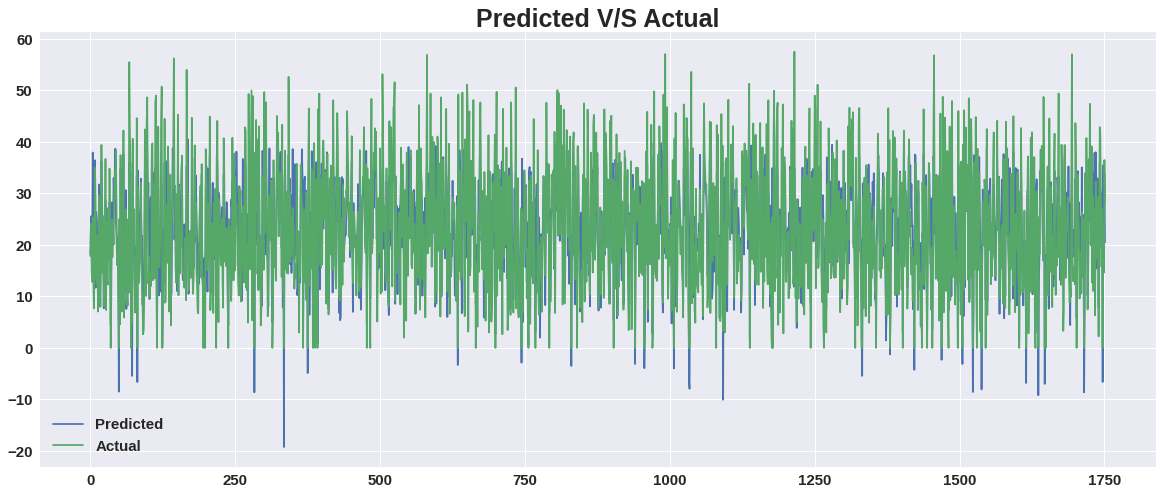

In [81]:
plot_Pred_vs_actual(y_pred_test,y_test)

Text(0.5, 0, 'y_predicted')

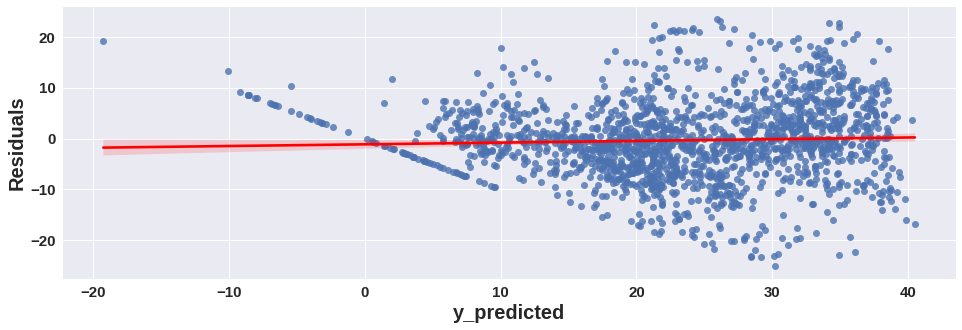

In [82]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred_test, y = y_test-y_pred_test,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

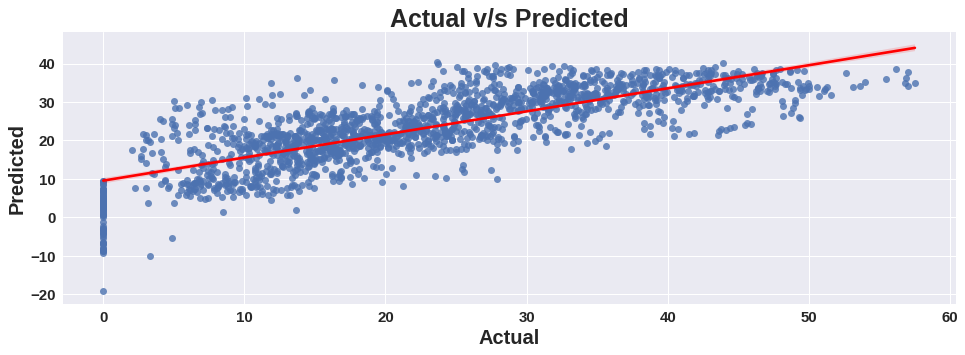

In [83]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred_test,y_test)

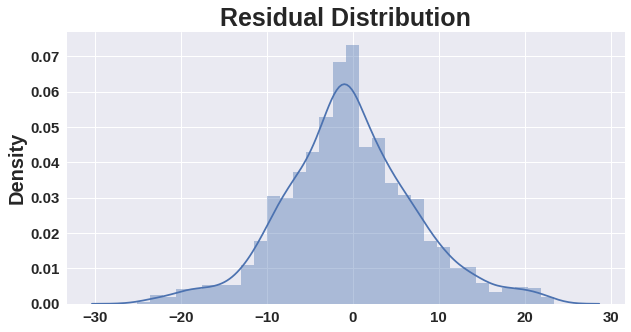

In [84]:
Residual_distPlot(y_pred_test,y_test)

Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 

### Lasso

In [85]:
# Initiating
lasso_reg = Lasso(alpha = 0.01)

In [86]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [87]:
# Check coefficient
lasso_reg.coef_

array([ 12.97608635,  23.17036055,   2.92564961,   3.76181635,
       -60.12549026,  -6.60481514,  -2.33756151,  28.00086375,
         0.69925601,  -0.51544181,   0.        ,  -0.        ,
         3.14262024,  -3.71319284])

In [88]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
Hour,12.976086
Temperature(°C),23.170361
Wind speed (m/s),2.925650
Solar Radiation (MJ/m2),3.761816
Rainfall(mm),-60.125490
Snowfall (cm),-6.604815
Holiday,-2.337562
Functioning Day,28.000864
Month,0.699256
Weekdays_or_weekend,-0.515442


In [89]:
# Check intercept
lasso_reg.intercept_

-23.414809184006494

In [90]:
# Checking score
lasso_reg.score(X_train,y_train)

0.6120697692358309

In [91]:
# y prdiction on train data
y_pred_train = lasso_reg.predict(X_train)
# y prdiction on test data
y_pred = lasso_reg.predict(X_test)

In [92]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.849593655263926.
The Mean Squred Error(MSE) is 59.87048388560954.
The Root Mean Squared Error(RMSE) is 7.737601946702191.
The R2 Score is 0.6120697692358309.


In [93]:
# Create train results dictionary
train_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4)}

In [94]:
# appending train result to training result dataframe
traing_results_df = traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.8338,59.7060,7.7270,0.6131
1,Lasso,5.8496,59.8705,7.7376,0.6121


In [95]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.92425618846209.
 The Mean Squred Error(MSE) is 60.37268999136832.
The Root Mean Squared Error(RMSE) is 7.769986485919285.
The R2 Score is 0.6166478836096304.


In [96]:
# Create test results dictionary
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4)}

In [97]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.9069,60.0396,7.7485,0.6131
1,Lasso,5.9243,60.3727,7.7700,0.6166


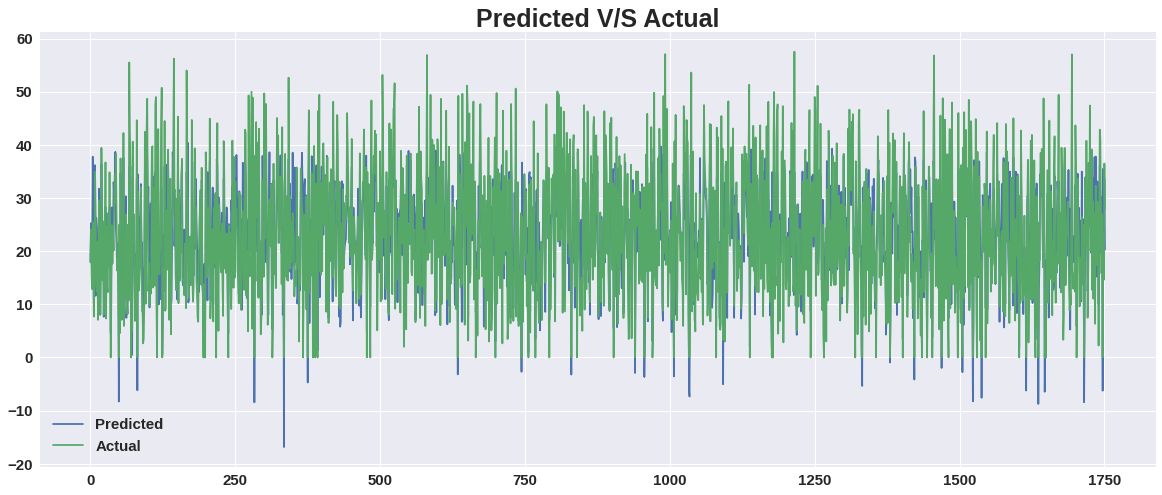

In [98]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

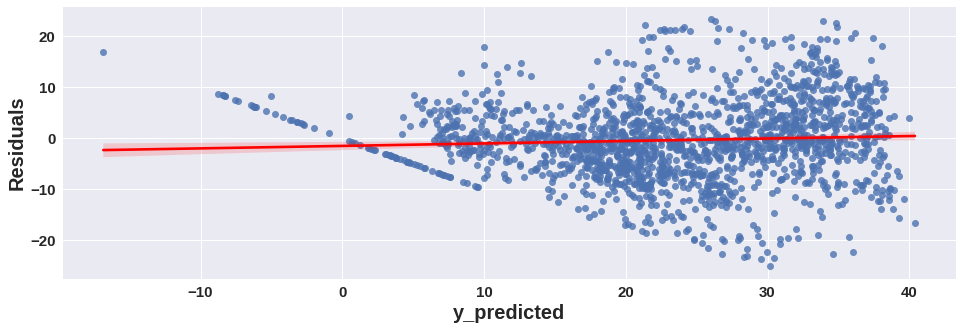

In [99]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

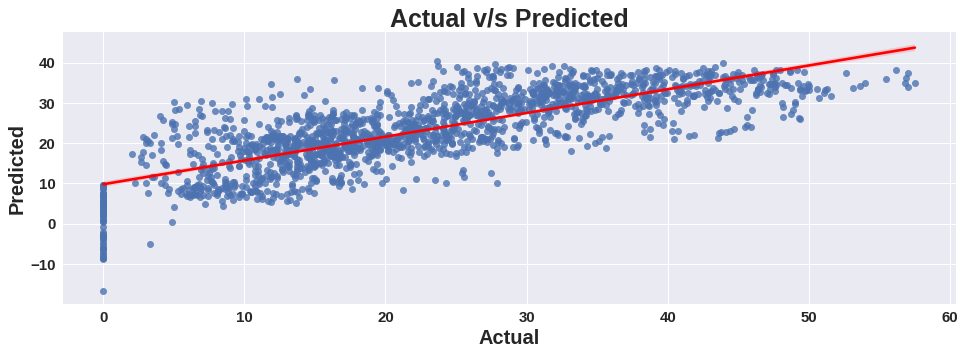

In [100]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

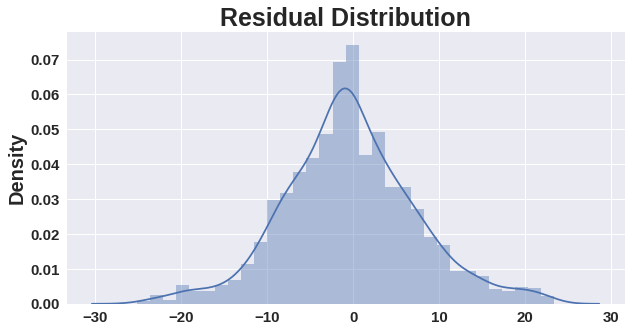

In [101]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)